In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# This file includes:
#  -> Cleaning of Data
#  -> Visualization of Data
#  -> Correlation of Numeric Data
#  -> Cross Tab for Categorical Data
#  -> HeatMap 

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.shape

(950, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  950 non-null    int64  
 1   Survived     947 non-null    float64
 2   Pclass       950 non-null    object 
 3   Name         950 non-null    object 
 4   Sex          949 non-null    object 
 5   Age          765 non-null    float64
 6   SibSp        950 non-null    int64  
 7   ParCh        950 non-null    int64  
 8   Ticket       950 non-null    object 
 9   Fare         948 non-null    float64
 10  Cabin        219 non-null    object 
 11  Embarked     946 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 89.2+ KB


In [7]:
df.describe()

,PassengerId,Survived,Age,SibSp,ParCh,Fare
count,950.000000,947.000000,765.000000,950.000000,950.000000,948.000000
mean,475.500000,0.387540,29.810680,0.523158,6.020000,32.220415
std,274.385677,0.500288,14.520943,1.086846,122.890035,49.605518
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238.250000,0.000000,21.000000,0.000000,0.000000,7.925000
50%,475.500000,0.000000,28.000000,0.000000,0.000000,14.458300
75%,712.750000,1.000000,39.000000,1.000000,0.000000,31.000000
max,950.000000,3.000000,80.000000,8.000000,2698.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         3
Pclass           0
Name             0
Sex              1
Age            185
SibSp            0
ParCh            0
Ticket           0
Fare             2
Cabin          731
Embarked         4
dtype: int64

In [9]:
null_row = df[df['Sex'].isnull()]
print(null_row)

     PassengerId  Survived             Pclass  Name  Sex  Age  SibSp  ParCh  \
920          921       3.0  Samaan, Mr. Elias  male  NaN  2.0      0   2662   

      Ticket  Fare Cabin Embarked  
920  21.6792   NaN     C      NaN  


In [10]:
df.drop(index=920, inplace=True)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         3
Pclass           0
Name             0
Sex              0
Age            185
SibSp            0
ParCh            0
Ticket           0
Fare             1
Cabin          731
Embarked         3
dtype: int64

In [14]:
num = df.columns[(df == 'Daher, Mr. Shedid').any()].tolist()
print(num)

['Pclass']


In [15]:
num1 = df[df['Pclass'] == 'Daher, Mr. Shedid']
print(num1)

     PassengerId  Survived             Pclass  Name   Sex  Age  SibSp  ParCh  \
918          919       3.0  Daher, Mr. Shedid  male  22.5  0.0      0   2698   

    Ticket  Fare Cabin Embarked  
918  7.225   NaN     C      NaN  


In [16]:
df.drop(index=918, inplace=True)

In [17]:
class_group = df.groupby('Pclass')['Age']
num = class_group.apply(lambda x: x.isnull().sum())
num1 = class_group.count()
print(num,'\n')
num1

Pclass
1     32
2     12
3    141
Name: Age, dtype: int64 



Pclass
1    200
2    183
3    380
Name: Age, dtype: int64

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_10276\4216892978.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_pclass_counts = df.groupby(['AgeGroup', 'Pclass']).size().unstack()


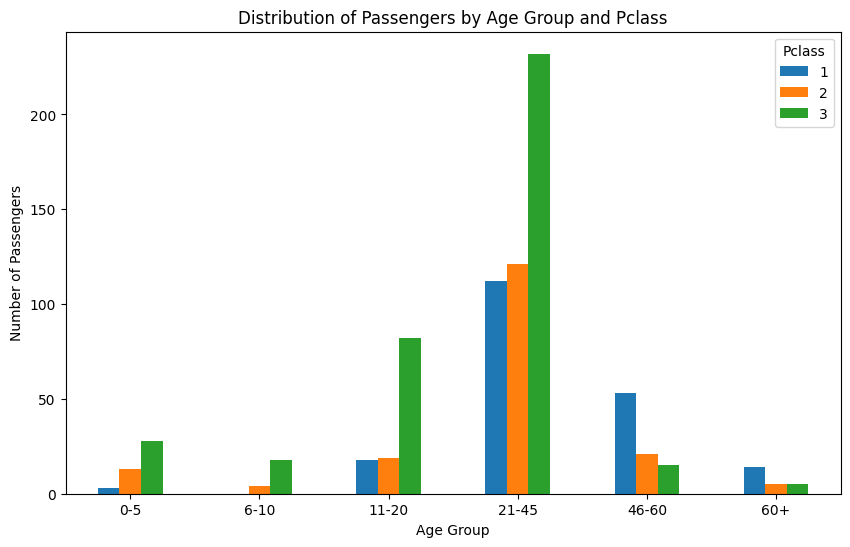

In [18]:
# bar chart for age and pclass

bins = [0,5,10,20,45,60,100]
labels = ['0-5','6-10','11-20','21-45','46-60','60+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_pclass_counts = df.groupby(['AgeGroup', 'Pclass']).size().unstack()

age_pclass_counts.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.xlabel("Age Group")
plt.ylabel("Number of Passengers")
plt.title("Distribution of Passengers by Age Group and Pclass")
plt.xticks(rotation=0)
plt.legend(title="Pclass")

plt.show()

In [19]:
mean_values = class_group.transform('mean')

df['Age'] = df['Age'].fillna(mean_values)

In [20]:
df.isnull().sum()

PassengerId      0
Survived         3
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
ParCh            0
Ticket           0
Fare             0
Cabin          731
Embarked         2
AgeGroup       185
dtype: int64

In [21]:
mode_values = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_values, inplace=True)

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_10276\1845024266.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(mode_values, inplace=True)


In [22]:
df.isnull().sum()

PassengerId      0
Survived         3
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
ParCh            0
Ticket           0
Fare             0
Cabin          731
Embarked         0
AgeGroup       185
dtype: int64

In [23]:
df['Cabin'].value_counts()

Cabin
C23 C25 C27    5
G6             4
B96 B98        4
E101           3
F33            3
              ..
B36            1
A21            1
D34            1
A9             1
C31            1
Name: count, Length: 153, dtype: int64

In [24]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [25]:
df.drop('PassengerId',axis=1,inplace=True)

In [26]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,AgeGroup
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-45
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,21-45
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-45
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,21-45
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,21-45


In [28]:
df.isnull().sum()

Survived      3
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
ParCh         0
Ticket        0
Fare          0
Cabin       731
Embarked      0
AgeGroup    185
dtype: int64

In [29]:
df = df.reset_index(drop=True)

In [32]:
null_rows = df[df['Survived'].isnull()]
null_rows

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,AgeGroup
310,NaN,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C,21-45
313,NaN,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,NaN,S,21-45
708,NaN,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S,21-45


In [33]:
df.isnull().sum()

Survived      3
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
ParCh         0
Ticket        0
Fare          0
Cabin       731
Embarked      0
AgeGroup    185
dtype: int64

In [34]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,AgeGroup
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-45
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,21-45
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-45
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,21-45
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,21-45


In [35]:
df.isnull().sum()

Survived      3
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
ParCh         0
Ticket        0
Fare          0
Cabin       731
Embarked      0
AgeGroup    185
dtype: int64

In [36]:
null_rows = df[df['Survived'].isnull()]
null_rows

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,AgeGroup
310,NaN,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C,21-45
313,NaN,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,NaN,S,21-45
708,NaN,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S,21-45


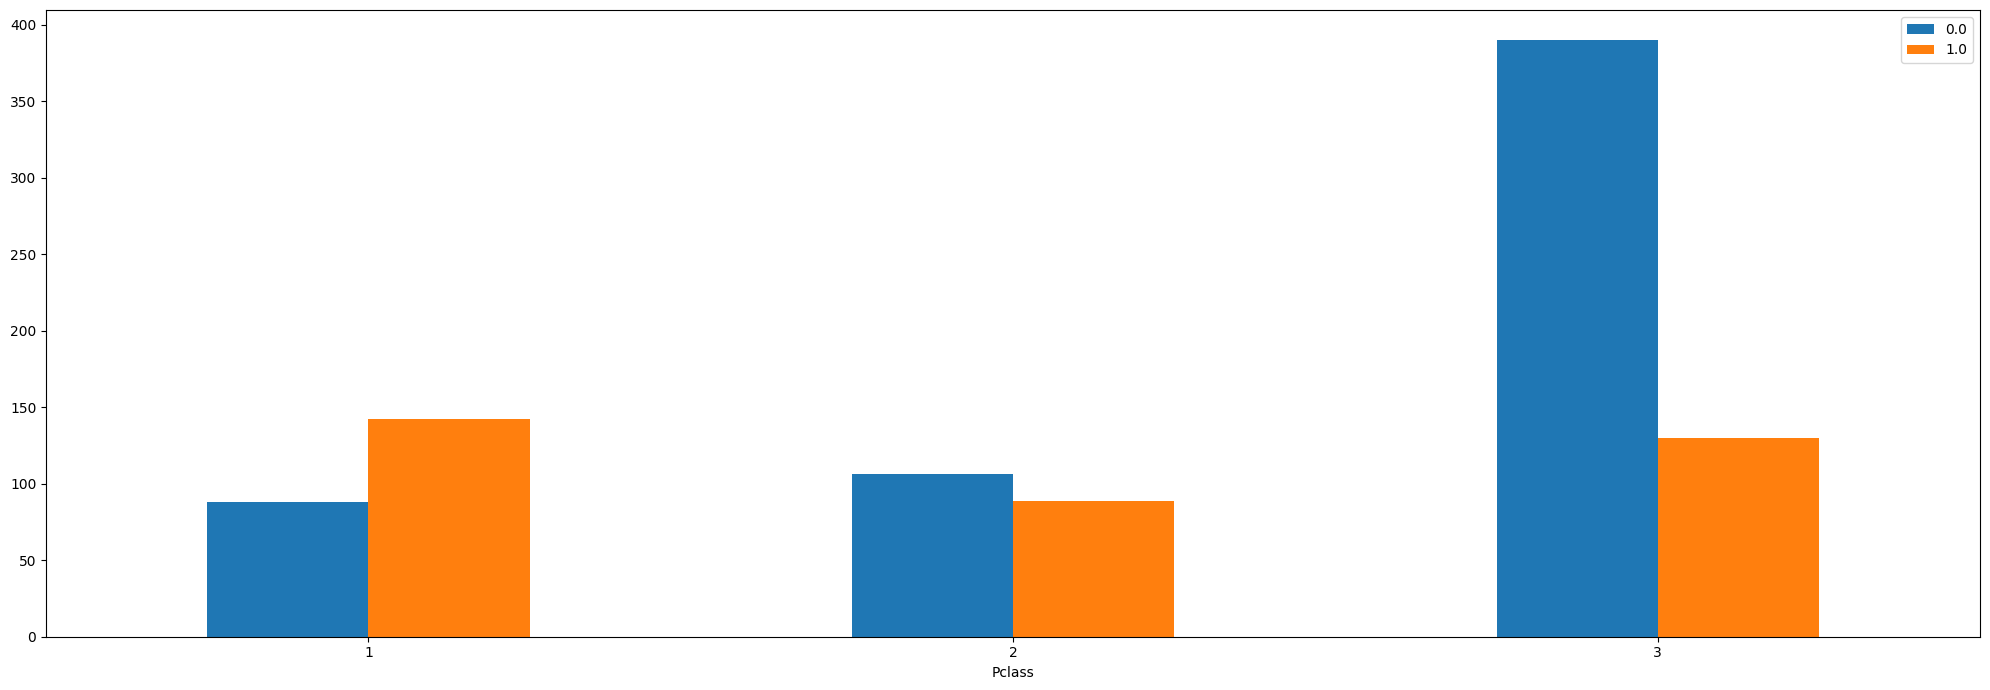

In [37]:
cabin_class_counts = df.groupby(['Pclass','Survived']).size().unstack()
cabin_class_counts.plot(kind='bar', figsize=(20,7))

plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
men_survived = (df[df['Sex']=='male']['Survived'].mean())*100
print('Percentage of Men Survived :',men_survived)

Percentage of Men Survived : 19.312602291325696


In [39]:
women_survived = (df[df['Sex']=='female']['Survived'].mean())*100
print('Percentage of Women Survived :',women_survived)

Percentage of Women Survived : 72.75449101796407


In [40]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [41]:
df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,AgeGroup
0,0.0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,21-45
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,21-45
2,1.0,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,21-45
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,21-45
4,0.0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,21-45
5,0.0,3,"Moran, Mr. James",male,25.33400,0,0,330877,8.4583,NaN,Q,NaN
6,0.0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S,46-60
7,0.0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S,0-5
8,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,NaN,S,21-45
9,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,NaN,C,11-20


In [42]:
df['Unique_Cabin'] = df['Cabin'].str[0]

In [43]:
df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,AgeGroup,Unique_Cabin
0,0.0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,21-45,NaN
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,21-45,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,21-45,NaN
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,21-45,C
4,0.0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,21-45,NaN
5,0.0,3,"Moran, Mr. James",male,25.33400,0,0,330877,8.4583,NaN,Q,NaN,NaN
6,0.0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S,46-60,E
7,0.0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S,0-5,NaN
8,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,NaN,S,21-45,NaN
9,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,NaN,C,11-20,NaN


In [44]:
df['Unique_Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [45]:
cabin_num = df.groupby('Pclass')['Unique_Cabin'].value_counts()
cabin_num

Pclass  Unique_Cabin
1       C               62
        B               50
        D               32
        E               26
        A               17
        T                1
2       F                8
        D                4
        E                4
3       F                6
        G                4
        E                3
Name: count, dtype: int64

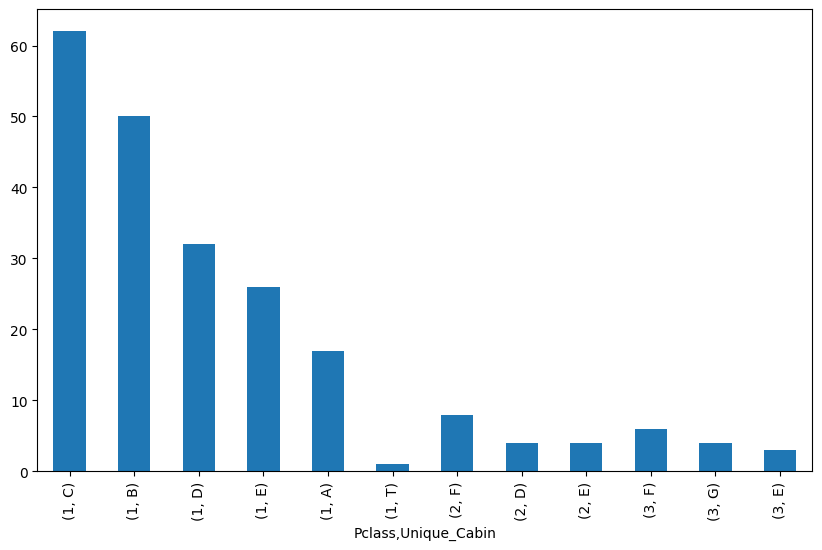

In [46]:
cabin_num.plot(kind='bar',figsize=(10,6))
plt.show()

In [47]:
df.shape

(948, 13)

In [48]:
least_frequent_values = df.groupby('Pclass')['Unique_Cabin'].apply(lambda x: x.value_counts().idxmin())

df['Unique_Cabin'].fillna(df['Pclass'].map(least_frequent_values), inplace=True)

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_10276\3362187481.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Unique_Cabin'].fillna(df['Pclass'].map(least_frequent_values), inplace=True)


In [49]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,AgeGroup,Unique_Cabin
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-45,E
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,21-45,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-45,E
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,21-45,C
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,21-45,E


In [50]:
cabin_num = df.groupby('Pclass')['Unique_Cabin'].value_counts()
cabin_num

Pclass  Unique_Cabin
1       C                62
        B                50
        T                45
        D                32
        E                26
        A                17
2       D               183
        F                 8
        E                 4
3       E               511
        F                 6
        G                 4
Name: count, dtype: int64

In [51]:
men_survived = (df[df['Sex']=='male']['Survived'].mean())*100
men_dead = 100-men_survived

women_survived = (df[df['Sex']=='female']['Survived'].mean())*100
women_dead = 100-women_survived

print("-> Men survived: ",men_survived)
print("   Men Dead: ",men_dead,'\n')

print("-> Women survived: ",women_survived)
print("   Women Dead: ",women_dead)

-> Men survived:  19.312602291325696
   Men Dead:  80.6873977086743 

-> Women survived:  72.75449101796407
   Women Dead:  27.24550898203593


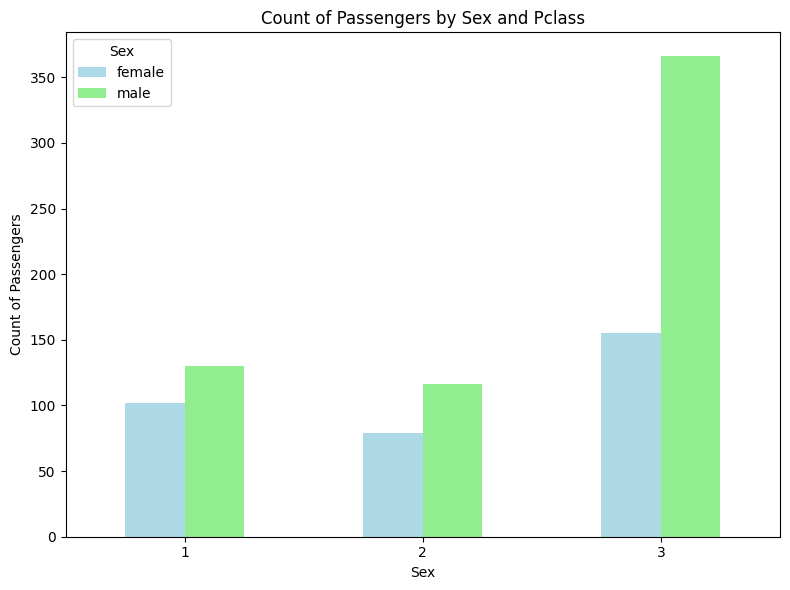

In [52]:
# bar chart to show men and women in pclass

group1 = df.groupby(['Pclass','Sex']).size().unstack()

group1.plot(kind='bar',figsize=(8,6), color=['lightblue', 'lightgreen', 'lightcoral'])

plt.xlabel('Sex')
plt.ylabel('Count of Passengers')
plt.title('Count of Passengers by Sex and Pclass')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [81]:
women_in_1st_class = df[(df['Sex'] == 'female') & (df['Pclass'] == '1')].shape[0]
print(f"Number of Women in 1st class: {women_in_1st_class}")

Number of Women in 1st class: 102


In [ ]:
df.isnull().sum()

In [ ]:
print(df['Sex'].unique(),'\n')
print(df['Pclass'].unique())

In [ ]:
female_survived1 = (df[(df['Sex']=='female') & (df['Pclass']=='1')]['Survived'].mean())*100
female_survived2 = (df[(df['Sex']=='female') & (df['Pclass']=='2')]['Survived'].mean())*100
female_survived3 = (df[(df['Sex']=='female') & (df['Pclass']=='3')]['Survived'].mean())*100

print("Female Survived in 1st Class", female_survived1)
print("Female Survived in 2nd Class", female_survived2)
print("Female Survived in 3rd Class", female_survived3)

In [ ]:
male_survived1 = (df[(df['Sex']=='male') & (df['Pclass']=='1')]['Survived'].mean())*100
male_survived2 = (df[(df['Sex']=='male') & (df['Pclass']=='2')]['Survived'].mean())*100
male_survived3 = (df[(df['Sex']=='male') & (df['Pclass']=='3')]['Survived'].mean())*100

print("Male Survived in 1st Class", male_survived1)
print("Male Survived in 2nd Class", male_survived2)
print("Male Survived in 3rd Class", male_survived3)

In [ ]:
print(df['Age'].dtype)

In [ ]:
df['Age'] = df['Age'].astype(float)

In [ ]:
df['Age'] = df['Age'].astype(int)

In [ ]:
df.head()

In [ ]:
childSurvived1 = (df[(df['Age']<18)&(df['Pclass']=='1')]['Survived'].mean())*100
childSurvived2 = (df[(df['Age']<18)&(df['Pclass']=='2')]['Survived'].mean())*100
childSurvived3 = (df[(df['Age']<18)&(df['Pclass']=='3')]['Survived'].mean())*100

print("Children Survived in 1st Class", childSurvived1)
print("Children Survived in 2nd Class", childSurvived2)
print("Children Survived in 3rd Class", childSurvived3)

In [ ]:
oldSurvived1 = (df[(df['Age']>59)&(df['Pclass']=='1')]['Survived'].mean())*100
oldSurvived2 = (df[(df['Age']>59)&(df['Pclass']=='2')]['Survived'].mean())*100
oldSurvived3 = (df[(df['Age']>59)&(df['Pclass']=='3')]['Survived'].mean())*100

print("Old Survived in 1st Class", oldSurvived1)
print("Old Survived in 2nd Class", oldSurvived2)
print("Old Survived in 3rd Class", oldSurvived3)

In [ ]:
# data visualization to understand data more properly

In [ ]:
grouped_data = df.groupby(['Pclass','Sex']).size().unstack()

print(grouped_data)

In [ ]:
grouped_data.plot(kind='bar', figsize=(10,6))
plt.title("Titanic Passengers by Sex and Pclass")
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.show()


In [ ]:
pclass_sex = df.groupby(['Pclass','Sex']).size().unstack()
pclass_sex = pclass_sex.div(pclass_sex.sum(axis=1),axis=0)*100

pclass_sex.plot(kind='bar', figsize=(10,6))
plt.show()

In [ ]:
group2 = df.groupby(['Pclass','Survived']).size().unstack()
print(group2)

In [ ]:
group2.plot(kind='bar', figsize=(10,6))
plt.xticks(rotation=0)
plt.title("Titanic Passengers by Survived and Pclass")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

In [ ]:
pclass_survived = df.groupby('Pclass')['Survived'].mean()*100
pclass_survived.plot(kind='bar', figsize=(10,6), color='green')
plt.show()

In [ ]:
group3 = df.groupby(['Pclass','Sex','Survived']).size().unstack()
print(group3)

In [ ]:
group3.plot(kind='bar', figsize=(10,6))
plt.xticks(rotation=0)
plt.title("Titanic Passengers by Sex,Survived and Pclass")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

In [ ]:
group3 = df.groupby(['Pclass','Sex'])['Survived'].mean()*100
print(group3)

In [ ]:
group3 = df.groupby(['Pclass','Sex'])['Survived'].mean()*100
group3 = group3.unstack()
group3.plot(kind='bar', figsize=(10,6))
plt.xticks(rotation=0)
plt.title("Titanic Passengers by Sex,Survived and Pclass")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

In [ ]:
group4 = df.groupby(['Pclass','AgeGroup']).size().unstack()
print(group4)

In [ ]:
group4.plot(kind='bar',figsize=(10,6))
plt.xticks(rotation=0)
plt.xlabel("Age group")
plt.ylabel("Number of Passengers")
plt.show()

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_10276\2972945625.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group4 = df.groupby(['Pclass','AgeGroup']).size().unstack()


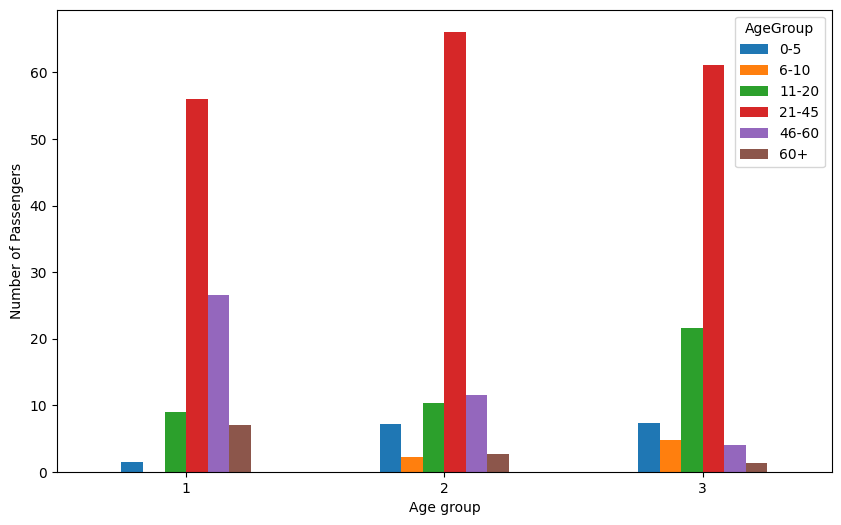

In [83]:
group4 = df.groupby(['Pclass','AgeGroup']).size().unstack()
group4_percentage = group4.div(group4.sum(axis=1), axis=0) * 100
group4_percentage.plot(kind='bar', figsize=(10,6))

plt.xticks(rotation=0)
plt.xlabel("Age group")
plt.ylabel("Number of Passengers")
plt.show()

In [54]:
new_df = df[['Survived','Pclass','Age','AgeGroup','Unique_Cabin','SibSp','ParCh']]

In [55]:
new_df.head()

,Survived,Pclass,Age,AgeGroup,Unique_Cabin,SibSp,ParCh
0,0.0,3,22.0,21-45,E,1,0
1,1.0,1,38.0,21-45,C,1,0
2,1.0,3,26.0,21-45,E,0,0
3,1.0,1,35.0,21-45,C,1,0
4,0.0,3,35.0,21-45,E,0,0


In [56]:
new_df.columns

Index(['Survived', 'Pclass', 'Age', 'AgeGroup', 'Unique_Cabin', 'SibSp',
       'ParCh'],
      dtype='object')

In [57]:
new_df.shape

(948, 7)

In [58]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      945 non-null    float64 
 1   Pclass        948 non-null    object  
 2   Age           948 non-null    float64 
 3   AgeGroup      763 non-null    category
 4   Unique_Cabin  948 non-null    object  
 5   SibSp         948 non-null    int64   
 6   ParCh         948 non-null    int64   
dtypes: category(1), float64(2), int64(2), object(2)
memory usage: 45.7+ KB


In [59]:
new_df.isnull().sum()

Survived          3
Pclass            0
Age               0
AgeGroup        185
Unique_Cabin      0
SibSp             0
ParCh             0
dtype: int64

In [60]:
numerical_df = df[['Survived','Pclass','Age','SibSp','ParCh','Sex']]

In [61]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  945 non-null    float64
 1   Pclass    948 non-null    object 
 2   Age       948 non-null    float64
 3   SibSp     948 non-null    int64  
 4   ParCh     948 non-null    int64  
 5   Sex       948 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 44.6+ KB


In [62]:
numerical_df.head()

,Survived,Pclass,Age,SibSp,ParCh,Sex
0,0.0,3,22.0,1,0,male
1,1.0,1,38.0,1,0,female
2,1.0,3,26.0,0,0,female
3,1.0,1,35.0,1,0,female
4,0.0,3,35.0,0,0,male


In [63]:
numerical_df['Sex'] = numerical_df['Sex'].replace({'female':0, 'male':1})

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_10276\1611486110.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numerical_df['Sex'] = numerical_df['Sex'].replace({'female':0, 'male':1})
C:\Users\Dushyant\AppData\Local\Temp\ipykernel_10276\1611486110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['Sex'] = numerical_df['Sex'].replace({'female':0, 'male':1})


In [64]:
numerical_df.head()

,Survived,Pclass,Age,SibSp,ParCh,Sex
0,0.0,3,22.0,1,0,1
1,1.0,1,38.0,1,0,0
2,1.0,3,26.0,0,0,0
3,1.0,1,35.0,1,0,0
4,0.0,3,35.0,0,0,1


In [65]:
# Correlation
corr_matrix = numerical_df.corr()
corr_matrix

,Survived,Pclass,Age,SibSp,ParCh,Sex
Survived,1.000000,-0.319736,-0.053926,-0.039736,0.084021,-0.525794
Pclass,-0.319736,1.000000,-0.401186,0.073557,0.015069,0.130159
Age,-0.053926,-0.401186,1.000000,-0.237828,-0.173596,0.073822
SibSp,-0.039736,0.073557,-0.237828,1.000000,0.411472,-0.115313
ParCh,0.084021,0.015069,-0.173596,0.411472,1.000000,-0.250527
Sex,-0.525794,0.130159,0.073822,-0.115313,-0.250527,1.000000


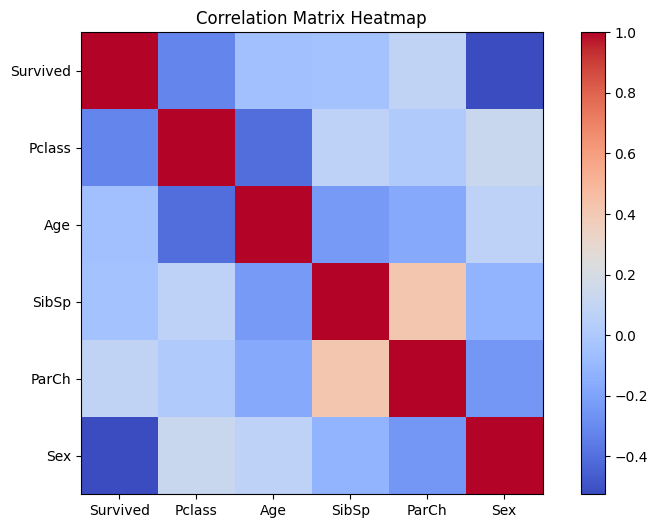

In [66]:
# HeatMap for numerical_df

fig, ax = plt.subplots(figsize=(10,6))
cax = ax.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
fig.colorbar(cax)

ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [67]:
print(np.arange(len(corr_matrix.columns)))

[0 1 2 3 4 5]


In [68]:
cross_tab1 = pd.crosstab(df['Unique_Cabin'], df['SibSp'])
cross_tab1

SibSp,0,1,2,3,4,5,8
Unique_Cabin,,,,,,,
A,15,2,0,0,0,0,0
B,33,15,2,0,0,0,0
C,29,27,2,4,0,0,0
D,134,72,8,1,0,0,0
E,384,98,16,12,19,5,7
F,9,3,2,0,0,0,0
G,2,2,0,0,0,0,0
T,36,8,1,0,0,0,0


In [69]:
cross_tab2 = pd.crosstab(df['Unique_Cabin'], df['ParCh'])
cross_tab2

ParCh,0,1,2,3,4,5,6
Unique_Cabin,,,,,,,
A,16,0,1,0,0,0,0
B,29,12,8,1,0,0,0
C,45,6,10,0,1,0,0
D,160,36,17,2,0,0,0
E,422,61,46,3,3,5,1
F,8,5,1,0,0,0,0
G,0,3,1,0,0,0,0
T,42,3,0,0,0,0,0


In [70]:
new_df.head()

,Survived,Pclass,Age,AgeGroup,Unique_Cabin,SibSp,ParCh
0,0.0,3,22.0,21-45,E,1,0
1,1.0,1,38.0,21-45,C,1,0
2,1.0,3,26.0,21-45,E,0,0
3,1.0,1,35.0,21-45,C,1,0
4,0.0,3,35.0,21-45,E,0,0


In [71]:
new_df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [72]:
new_df['ParCh'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [73]:
group5 = new_df.groupby(['Unique_Cabin','Survived']).size().unstack()
print(group5)

Survived      0.0  1.0
Unique_Cabin          
A               9    8
B              13   37
C              26   35
D             112  103
E             393  147
F               5    9
G               2    2
T              24   20


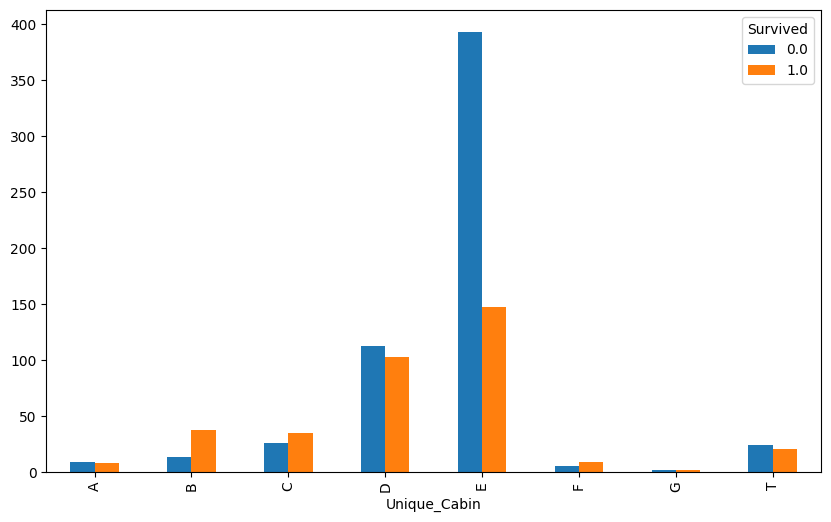

In [74]:
group5.plot(kind='bar', figsize=(10,6))
plt.show()

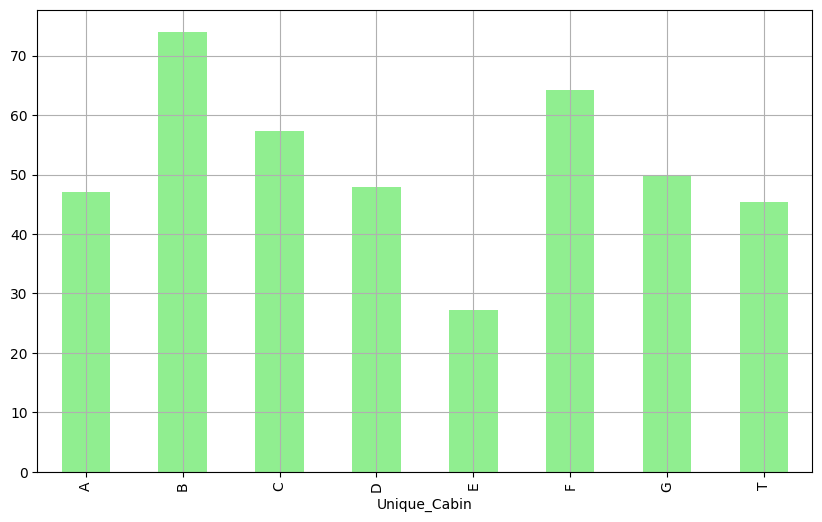

In [82]:
group5 = df.groupby('Unique_Cabin')['Survived'].mean()*100

group5.plot(kind='bar', figsize=(10,6), color='lightgreen')
plt.grid()
plt.show()

In [76]:
age_survived = df.groupby(['AgeGroup','Survived']).size().unstack()
print(age_survived)

Survived  0.0  1.0
AgeGroup          
0-5        13   31
6-10       14    8
11-20      72   47
21-45     281  181
46-60      54   35
60+        19    5


C:\Users\Dushyant\AppData\Local\Temp\ipykernel_10276\663411117.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survived = df.groupby(['AgeGroup','Survived']).size().unstack()


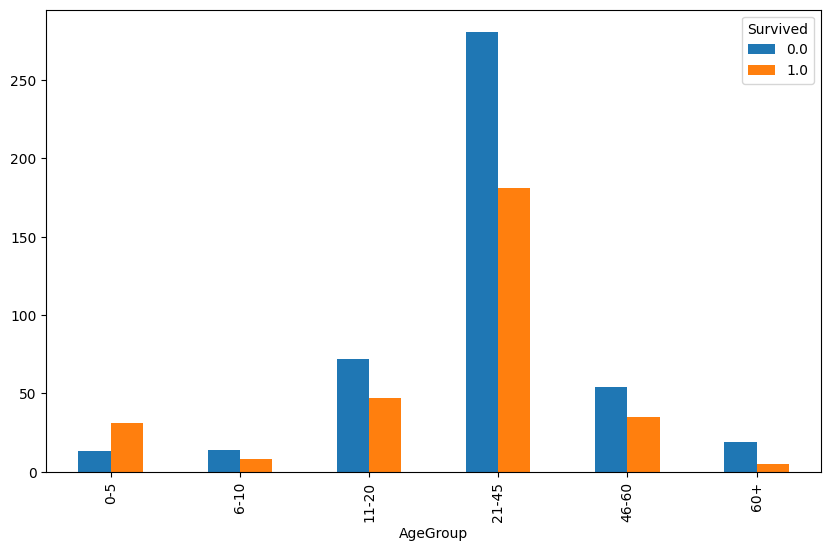

In [77]:
age_survived.plot(kind='bar', figsize=(10,6))
plt.show()

In [78]:
age_survived_class = df.groupby(['Pclass','AgeGroup'])['Survived'].size().unstack()
print(age_survived_class)

AgeGroup  0-5  6-10  11-20  21-45  46-60  60+
Pclass                                       
1           3     0     18    112     53   14
2          13     4     19    121     21    5
3          28    18     82    232     15    5


C:\Users\Dushyant\AppData\Local\Temp\ipykernel_10276\4244048716.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survived_class = df.groupby(['Pclass','AgeGroup'])['Survived'].size().unstack()


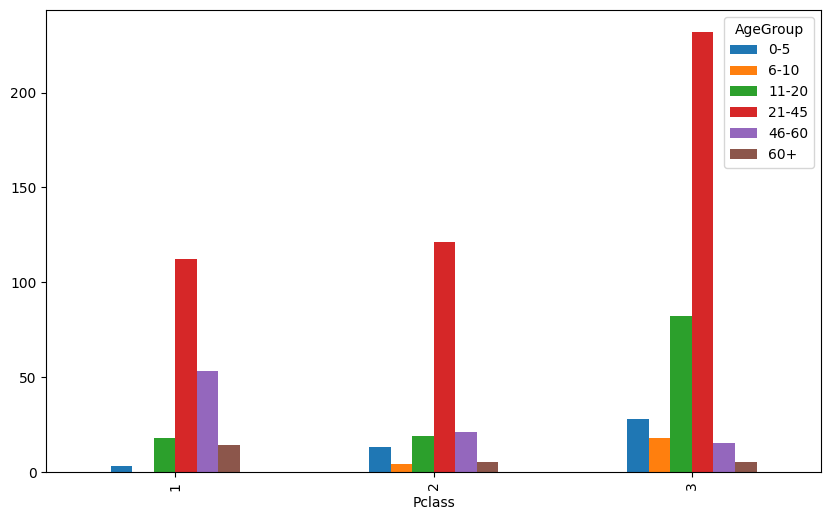

In [79]:
age_survived_class.plot(kind='bar', figsize=(10,6))
plt.show()

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_10276\1284245739.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survived_class = df.groupby(['Pclass','AgeGroup'])['Survived'].mean()*100


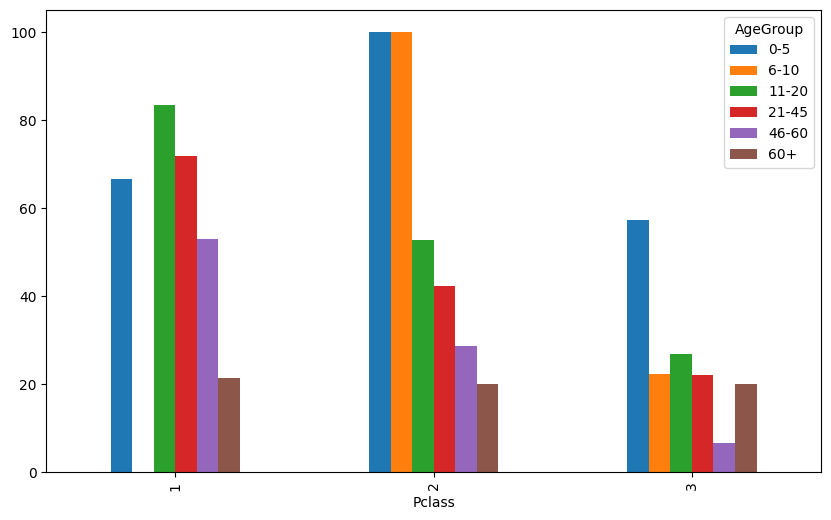

In [80]:
age_survived_class = df.groupby(['Pclass','AgeGroup'])['Survived'].mean()*100
age_survived_class = age_survived_class.unstack()

age_survived_class.plot(kind='bar', figsize=(10,6))
plt.show()

In [84]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,AgeGroup,Unique_Cabin
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-45,E
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,21-45,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-45,E
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,21-45,C
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,21-45,E


In [89]:
df.drop(['Name','Ticket','Fare','Cabin','Unique_Cabin'],axis=1,inplace=True)

In [90]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh,Embarked,AgeGroup
0,0.0,3,male,22.0,1,0,S,21-45
1,1.0,1,female,38.0,1,0,C,21-45
2,1.0,3,female,26.0,0,0,S,21-45
3,1.0,1,female,35.0,1,0,S,21-45
4,0.0,3,male,35.0,0,0,S,21-45


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  945 non-null    float64 
 1   Pclass    948 non-null    object  
 2   Sex       948 non-null    object  
 3   Age       948 non-null    float64 
 4   SibSp     948 non-null    int64   
 5   ParCh     948 non-null    int64   
 6   Embarked  948 non-null    object  
 7   AgeGroup  763 non-null    category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 53.1+ KB


In [93]:
df.isnull().sum()

Survived      3
Pclass        0
Sex           0
Age           0
SibSp         0
ParCh         0
Embarked      0
AgeGroup    185
dtype: int64

In [95]:
df['AgeGroup'].unique()

['21-45', NaN, '46-60', '0-5', '11-20', '6-10', '60+']
Categories (6, object): ['0-5' < '6-10' < '11-20' < '21-45' < '46-60' < '60+']

In [96]:
df.dropna(inplace=True)

In [97]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
ParCh       0
Embarked    0
AgeGroup    0
dtype: int64

In [98]:
df[['Age','Survived']] = df[['Age','Survived']].astype(int)

In [99]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh,Embarked,AgeGroup
0,0,3,male,22,1,0,S,21-45
1,1,1,female,38,1,0,C,21-45
2,1,3,female,26,0,0,S,21-45
3,1,1,female,35,1,0,S,21-45
4,0,3,male,35,0,0,S,21-45


In [100]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [101]:
df['Embarked'] = df['Embarked'].replace({'S':0, 'C':1, 'Q':2})

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_10276\1837567240.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Embarked'] = df['Embarked'].replace({'S':0, 'C':1, 'Q':2})


In [102]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh,Embarked,AgeGroup
0,0,3,male,22,1,0,0,21-45
1,1,1,female,38,1,0,1,21-45
2,1,3,female,26,0,0,0,21-45
3,1,1,female,35,1,0,0,21-45
4,0,3,male,35,0,0,0,21-45


In [103]:
print(df['Embarked'].unique())

[0 1 2]


In [104]:
print(df['AgeGroup'].unique())

['21-45', '46-60', '0-5', '11-20', '6-10', '60+']
Categories (6, object): ['0-5' < '6-10' < '11-20' < '21-45' < '46-60' < '60+']


In [106]:
df['AgeGroup'] = df['AgeGroup'].replace({'0-5':0, '6-10':1, '11-20':2, '21-45':3, '46-60':4, '60+':5})

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_10276\3799617543.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['AgeGroup'] = df['AgeGroup'].replace({'0-5':0, '6-10':1, '11-20':2, '21-45':3, '46-60':4, '60+':5})
C:\Users\Dushyant\AppData\Local\Temp\ipykernel_10276\3799617543.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['AgeGroup'] = df['AgeGroup'].replace({'0-5':0, '6-10':1, '11-20':2, '21-45':3, '46-60':4, '60+':5})


In [107]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh,Embarked,AgeGroup
0,0,3,male,22,1,0,0,3
1,1,1,female,38,1,0,1,3
2,1,3,female,26,0,0,0,3
3,1,1,female,35,1,0,0,3
4,0,3,male,35,0,0,0,3


In [108]:
print(df['AgeGroup'].unique())

[3, 4, 0, 2, 1, 5]
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]


In [109]:
df['Sex'] = df['Sex'].replace({'female':0, 'male':1})

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_10276\3341432835.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'female':0, 'male':1})


In [110]:
print(df['Sex'].unique())

[1 0]


In [111]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh,Embarked,AgeGroup
0,0,3,1,22,1,0,0,3
1,1,1,0,38,1,0,1,3
2,1,3,0,26,0,0,0,3
3,1,1,0,35,1,0,0,3
4,0,3,1,35,0,0,0,3


In [112]:
df = df.reset_index(drop=True)

In [113]:
target_df = df['Survived']

In [127]:
target_df.shape

(760,)

In [114]:
target_df.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [115]:
df.drop('Survived',axis=1,inplace=True)

In [116]:
df.head()

,Pclass,Sex,Age,SibSp,ParCh,Embarked,AgeGroup
0,3,1,22,1,0,0,3
1,1,0,38,1,0,1,3
2,3,0,26,0,0,0,3
3,1,0,35,1,0,0,3
4,3,1,35,0,0,0,3


In [118]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
ParCh       0
Embarked    0
AgeGroup    0
dtype: int64

In [119]:
target_df.isnull().sum()

np.int64(0)

In [122]:
# Splitting the data

X = df
y = target_df

In [123]:
X.head()

,Pclass,Sex,Age,SibSp,ParCh,Embarked,AgeGroup
0,3,1,22,1,0,0,3
1,1,0,38,1,0,1,3
2,3,0,26,0,0,0,3
3,1,0,35,1,0,0,3
4,3,1,35,0,0,0,3


In [124]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [126]:
print(len(X_train),'\n')
print(len(X_test),'\n')
print(len(y_train),'\n')
print(len(y_test))

608 

152 

608 

152
